# Cálculo Númerico | Projeto 1 

* _Tema_: *Movimento Harmônico Simples (MHS)* 
    - A equação do movimento harmônico simples (MHS) descreve o comportamento oscilatório de um sistema que segue um padrão cíclico, como o movimento de um pêndulo ou uma mola em um sistema massa-mola. O MHS é um tipo de movimento periódico que ocorre quando a força restauradora é proporcional ao deslocamento do objeto em relação à posição de equilíbrio.

# **1 - Equação da Posição em Função do Tempo (x(t)):**

 $ x(t) = A * cos(ω*t + \phi) $

Onde:

- $x(t)$ é a posição do objeto no tempo t.

- $A$ é a amplitude da oscilação, que é a distância máxima entre a posição de equilíbrio e a posição máxima ou mínima.

- $ω$ é a frequência angular, relacionada com a frequência f pelo seguinte:
$ ω=2πf. $

- $t$ é o tempo.

- $ϕ$ é a fase inicial, que determina a posição inicial da oscilação.

# **2 - Equação da velocidade em Função do Tempo (v(t)):**

$ v(t) = -A * ω * sen(ω*t + \phi) $

Onde:

- $v(t)$ é a velocidade do objeto no tempo t.

- $A$ é a amplitude da oscilação

- $ω$ é a frequência angular

- $t$ é o tempo.

- $ϕ$ é a fase inicial

# **3 - Equação da aceleração em Função do Tempo (a(t)):**

$ a(t) = -A * \omega^2 * cos(\omega * t + \phi) $

Onde:

- $a(t)$ é a aceleração do objeto no tempo t.

- $A$ é a amplitude da oscilação

- $ω$ é a frequência angular

- $t$ é o tempo.

- $ϕ$ é a fase inicial

In [629]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import optimize
from sympy.utilities.lambdify import lambdify
import scipy.optimize as optimize

# Problema a ser solucionado:

* Uma determinada mola de um automóvel qualquer tem a função de amortecer impactos causados pelo contato dos pneus do automóvel com o solo e suas imperfeições. Dentre isso, pelo Movimento Harmônico Simples, é possível calcular a posição até que ponto a mola é deslocada/contraída, a velocidade e aceleração de dilatação/expansão da mola. Portanto, tendo essas informações, considerando valores como a amplitude máxima A = 0.18 metros, frequência angular como $\omega = 3\pi$ rad/s, considere um espaço de tempo de 3 segundo, é calculável a posição. velocidade e aceleração da mola. 

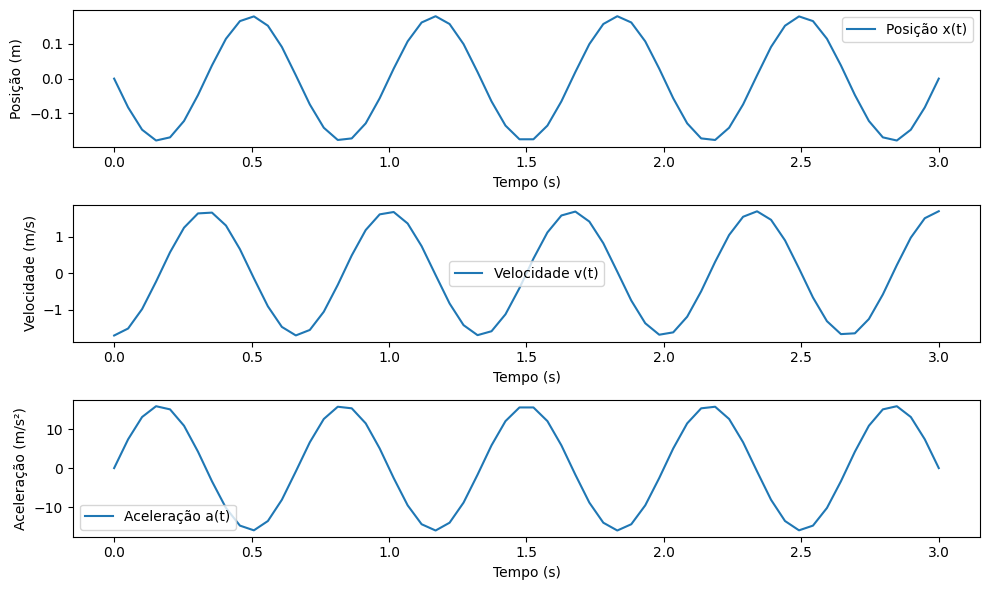

In [630]:
# Parâmetros
A = 0.18  # Amplitude em metros
w = 3 * np.pi  # frequência angular em rad/s
phi = np.pi / 2  # Fase inicial em radianos

# Intervalo de tempo de 0 a 3 segundos
t = np.linspace(0, 3, 60)

# Funções lambda para cálculo da posição, velocidade e aceleração
position = lambda t: A * np.cos(w * t + phi)
velocity = lambda t: -A * w * np.sin(w * t + phi)
acceleration = lambda t: -A * w**2 * np.cos(w * t + phi)

# Cálculos usando as funções lambda
x = position(t)
v = velocity(t)
a = acceleration(t)

# Plotagem gráfica
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# Gráfico de posição x(t)
axs[0].plot(t, x, label='Posição x(t)')
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Posição (m)')
axs[0].legend()

# Gráfico de velocidade v(t)
axs[1].plot(t, v, label='Velocidade v(t)')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Velocidade (m/s)')
axs[1].legend()

# Gráfico de aceleração a(t)
axs[2].plot(t, a, label='Aceleração a(t)')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Aceleração (m/s²)')
axs[2].legend()

plt.tight_layout()
plt.show()

In [631]:
# Símbolo de tempo para cálculos de derivadas
t_symbol = sp.Symbol('t', real=True)

# Funções SymPy correspondentes
position_sp = A * sp.cos(w * t_symbol + phi)
velocity_sp = -A * w * sp.sin(w * t_symbol + phi)
acceleration_sp = -A * w**2 * sp.cos(w * t_symbol + phi)

# Calcula as derivadas usando sp.diff
position_derivative = sp.diff(position_sp, t_symbol)
velocity_derivative = sp.diff(velocity_sp, t_symbol)
acceleration_derivative = sp.diff(acceleration_sp, t_symbol)

# Print dos resultados das derivadas
print("Derivada da posição em relação ao tempo:")
print(position_derivative)

print("\nDerivada da velocidade em relação ao tempo:")
print(velocity_derivative)

print("\nDerivada da aceleração em relação ao tempo:")
print(acceleration_derivative)

Derivada da posição em relação ao tempo:
-1.69646003293849*sin(9.42477796076938*t + 1.5707963267949)

Derivada da velocidade em relação ao tempo:
-15.9887591297648*cos(9.42477796076938*t + 1.5707963267949)

Derivada da aceleração em relação ao tempo:
150.690504666257*sin(9.42477796076938*t + 1.5707963267949)


Neste código, primeiro, calculamos a derivada numérica da função de posição usando o método de diferenças finitas. Em seguida, definimos uma função derivative_function que interpola os valores da derivada numérica em pontos do intervalo de tempo. Usamos o método de Newton para encontrar uma raiz dessa função. O resultado da raiz e outras informações são impressos.

Resultado do método de Newton:
(0.16684166265606415,       converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.16684166265606415)


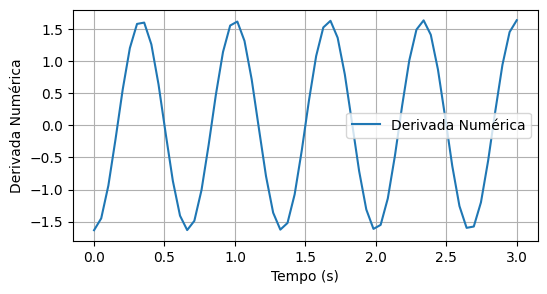

In [632]:
# Função de posição
position = lambda t: A * np.cos(w * t + phi)

# Cálculo da derivada numérica usando diferenças finitas
h = t[1] - t[0]  # Tamanho do passo
position_derivative_numeric = np.gradient(position(t), h)

# Método de Newton para encontrar raiz da derivada numérica
def derivative_function(x):
    return np.interp(x, t, position_derivative_numeric)

initial_guess = 1 # Estimativa inicial
root = optimize.newton(derivative_function, x0=initial_guess, full_output=True)

# Imprime o valor da raiz e informações adicionais
print("Resultado do método de Newton:")
print(root)

# Criação da figura e dos eixos
fig, axs = plt.subplots(figsize=(6, 3))

# Plotagem gráfica da derivada numérica
axs.plot(t, position_derivative_numeric, label='Derivada Numérica')
axs.set_xlabel('Tempo (s)')
axs.set_ylabel('Derivada Numérica')
axs.legend()
axs.grid()
plt.show()

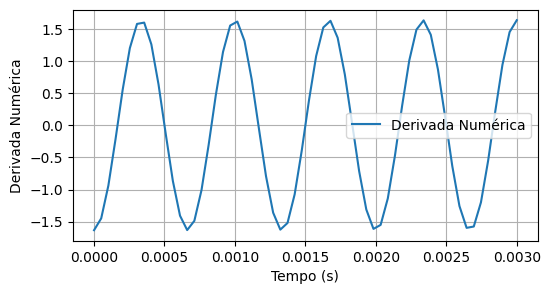

In [633]:
# descartado

t2 = np.linspace(0, 0.003, 60)

# Criação da figura e dos eixos
fig, axs_2 = plt.subplots(figsize=(6, 3))

# Plotagem gráfica da derivada numérica
axs_2.plot(t2, position_derivative_numeric, label='Derivada Numérica')
axs_2.set_xlabel('Tempo (s)')
axs_2.set_ylabel('Derivada Numérica')
axs_2.legend()
axs_2.grid()
plt.show()

- Melhorando e aplificando os graficos

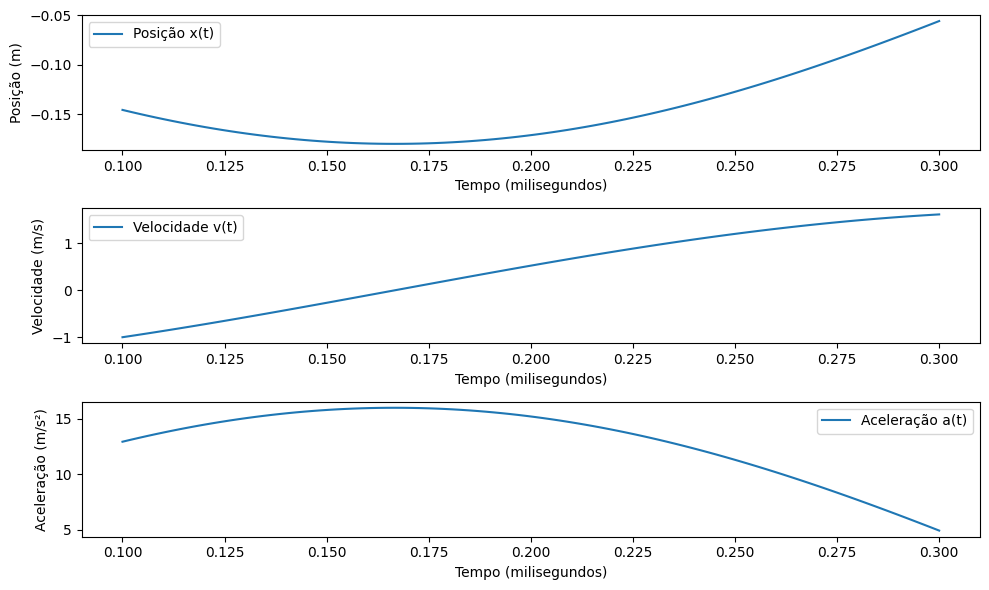

In [634]:
# Intervalo de tempo de 0 a 3 milisegundos
tx = np.linspace(0.1, 0.3, 100)

# Cálculos usando as funções lambda
x = position(tx)
v = velocity(tx)
a = acceleration(tx)

# Plotagem gráfica
fig, axs_2 = plt.subplots(3, 1, figsize=(10, 6))

# Gráfico de posição x(t)
axs_2[0].plot(tx, x, label='Posição x(t)')
axs_2[0].set_xlabel('Tempo (milisegundos)')
axs_2[0].set_ylabel('Posição (m)')
axs_2[0].legend()

# Gráfico de velocidade v(t)
axs_2[1].plot(tx, v, label='Velocidade v(t)')
axs_2[1].set_xlabel('Tempo (milisegundos)')
axs_2[1].set_ylabel('Velocidade (m/s)')
axs_2[1].legend()

# Gráfico de aceleração a(t)
axs_2[2].plot(tx, a, label='Aceleração a(t)')
axs_2[2].set_xlabel('Tempo (milisegundos)')
axs_2[2].set_ylabel('Aceleração (m/s²)')
axs_2[2].legend()

plt.tight_layout()
plt.show()

Resultado do método de Newton:
(0.16666666666666669,       converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.16666666666666669)


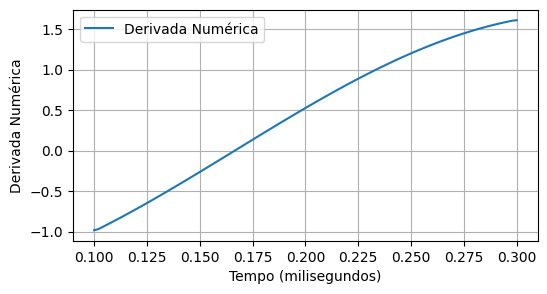

In [635]:
# Função de posição
position = lambda t: A * np.cos(w * t + phi)

# Cálculo da derivada numérica usando diferenças finitas
h = tx[1] - tx[0]  # Tamanho do passo
position_derivative_numeric = np.gradient(position(tx), h)

# Método de Newton para encontrar raiz da derivada numérica
def derivative_function(x):
    return np.interp(x, tx, position_derivative_numeric)

initial_guess = 0.1 # Estimativa inicial
root = optimize.newton(derivative_function, x0=initial_guess, full_output=True)

# Imprime o valor da raiz e informações adicionais
print("Resultado do método de Newton:")
print(root)

# Criação da figura e dos eixos
fig, axs = plt.subplots(figsize=(6, 3))

# Plotagem gráfica da derivada numérica
axs.plot(tx, position_derivative_numeric, label='Derivada Numérica')
axs.set_xlabel('Tempo (milisegundos)')
axs.set_ylabel('Derivada Numérica')
axs.legend()
axs.grid()
plt.show()